# MACHINE LEARNING: BÀI THỰC HÀNH SỐ 3.
# K-NN & MULTINOMIAL LOGISTIC REGRESSION

# A. PHƯƠNG PHÁP K-NN CHO PHÂN LOẠI NHIỀU LỚPA

## Ví dụ A.1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# randomly generate data
N = 500 # number of training sample
d = 2 # data dimension
C = 3 # number of classes (for c = 0, 1, 2)
means = [[2, 2], [8, 3], [3, 6]] # centeroid of each class dataset
cov = [[1, 0], [0, 1]]
# generate 3 classes of datasets
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# each column is a datapoint (arrange 3 vectors X1 X2 X3 then transpose matrix)
X = np.concatenate((X0, X1, X2), axis = 0).T
# Generate label for data points of each class (0, 1, 2)
# with first 500 will belong to class 0, second 500 => 1 and last 500=> class 2
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

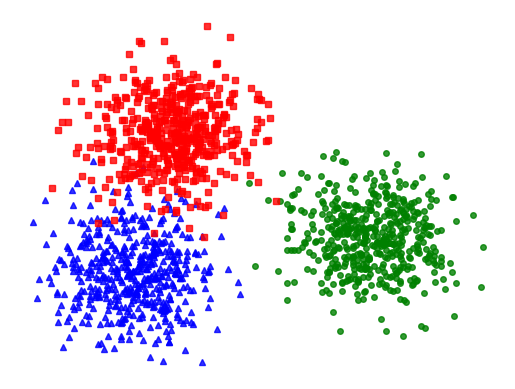

In [3]:
def display(X, label):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    plt.plot(X0[0, :], X0[1,:], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1,:], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1,:], 'rs', markersize = 4, alpha = .8)
    plt.axis('off')
    plt.plot()
    plt.show()

display(X[0:, :], original_label)

In [4]:
X_train = np.concatenate((X0[:400], X1[:400], X2[:400]), axis = 0)

Y_train = np.concatenate((original_label[:400], original_label[500:900],
original_label[1000:1400]), axis = 0)
X_val = np.concatenate((X0[400:], X1[400:], X2[400:]), axis = 0)
Y_val = np.concatenate((original_label[400:500], original_label[900:1000],
original_label[1400:1500]), axis = 0)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(1200, 2) (1200,) (300, 2) (300,)


In [40]:


def distance(array, value):
    array = np.array(array)
    return np.linalg.norm(array - value, ord=2, axis=1)  

In [ ]:
def find_nearest_index(X_train, x, K):
    distances = distance(X_train, x)
    return np.argsort(distances)[:K]  # Trả về K chỉ số nhỏ nhất


In [46]:
def highest_rank(arr):
    count_num = {}
    for i in arr:
        count_num[i] = count_num.get(i, 0) + 1  
    return max(count_num, key=count_num.get)  


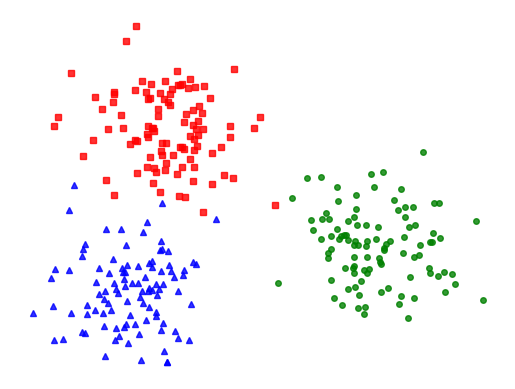

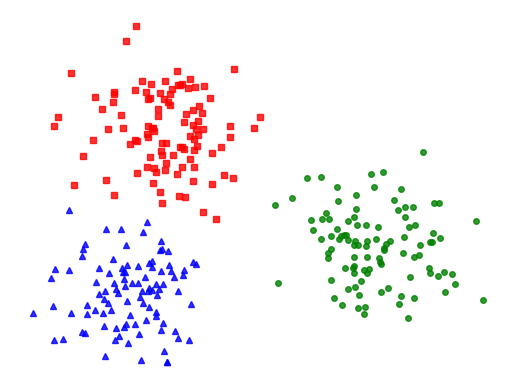

In [71]:
K = 20
y_pred = np.zeros(len(Y_val), dtype=int)

for j in range(len(Y_val)):
    indexes = find_nearest_index(X_train, X_val[j], K)
    y_nearest = Y_train[indexes]
    y_pred[j] = highest_rank(y_nearest)

display(X_val.T, Y_val)  # Nhãn thật
display(X_val.T, y_pred)  # Nhãn dự đoán


Accuracy Score: 0.9867
Precision Score: 0.9869
Recall Score: 0.9867


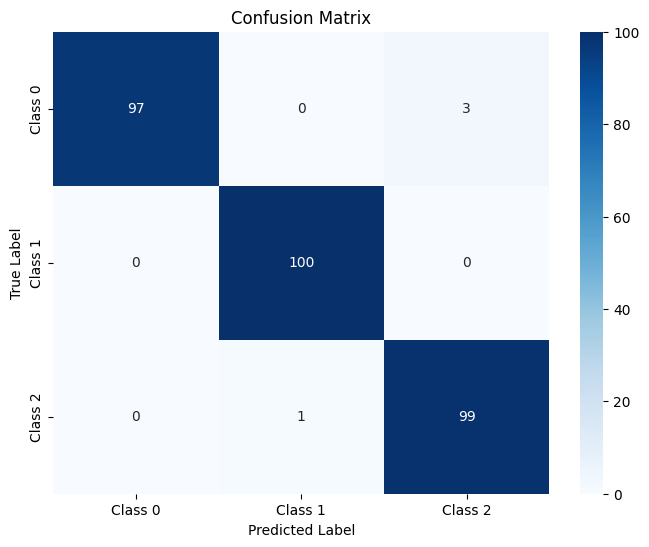

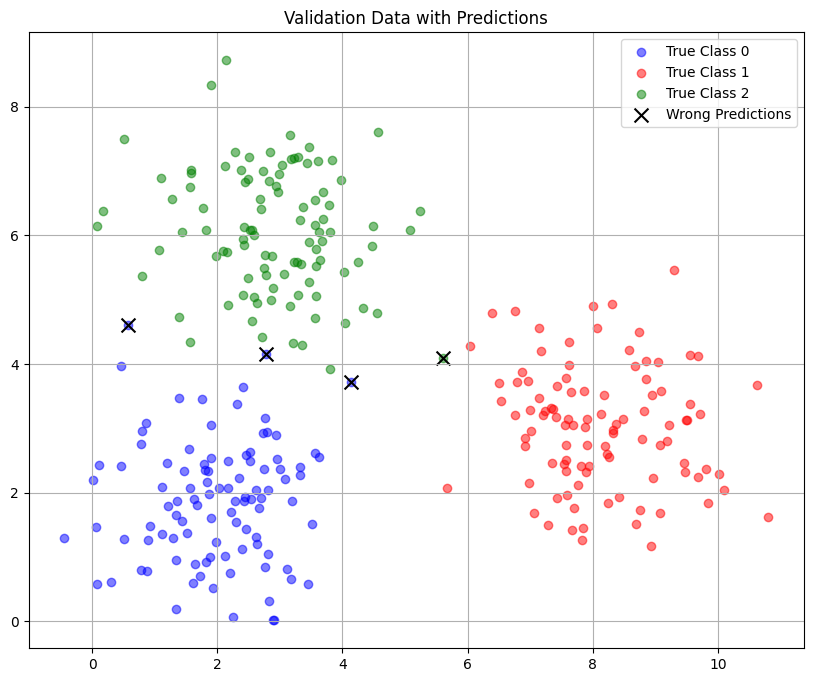

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

# Tính các metric đánh giá
accuracy = accuracy_score(Y_val, y_pred)
precision = precision_score(Y_val, y_pred, average='macro')  # 'macro' để tính trung bình cho tất cả classes
recall = recall_score(Y_val, y_pred, average='macro')

# In kết quả
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")

# Tính và vẽ ma trận nhầm lẫn
cm = confusion_matrix(Y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Thêm biểu đồ scatter để trực quan hóa dữ liệu validation và dự đoán
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']

# Vẽ điểm thực tế
for i in range(3):
    plt.scatter(X_val[Y_val == i, 0], X_val[Y_val == i, 1], 
                c=colors[i], alpha=0.5, label=f'True Class {i}')

# Vẽ các điểm bị dự đoán sai (nếu có)
wrong_pred = Y_val != y_pred
plt.scatter(X_val[wrong_pred, 0], X_val[wrong_pred, 1], 
            c='black', marker='x', s=100, label='Wrong Predictions')

plt.title('Validation Data with Predictions')
plt.legend()
plt.grid(True)
plt.show()

# B. HỒI QUY SOFTMAX (MULTINOMIAL LOGISTIC REGRESSION)

## Ví dụ B.1.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
# randomly generate data
N = 500 # number of training sample
d = 2 # data dimension
C = 3 # number of classes (for c = 0, 1, 2)
means = [[2, 2], [8, 3], [3, 6]] # centeroid of each class dataset
cov = [[1, 0], [0, 1]]

In [64]:
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# each column is a datapoint (arrange 3 vectors X1 X2 X3 then transpose matrix)
X = np.concatenate((X0, X1, X2), axis = 0).T
# Generate label for data points of each class (0, 1, 2)
# with first 500 will belong to class 0, second 500 => 1 and last 500=> class 2
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

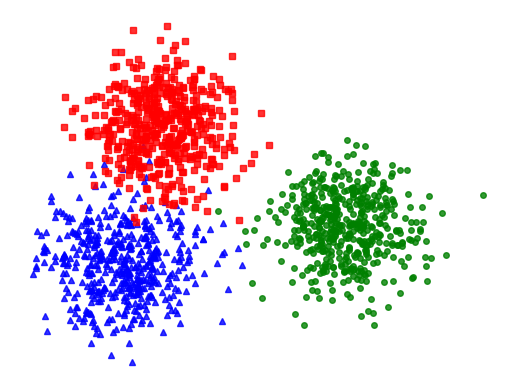

In [65]:
def display(X, label):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    plt.plot(X0[0, :], X0[1,:], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1,:], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1,:], 'rs', markersize = 4, alpha = .8)
    plt.axis('off')
    plt.plot()
    plt.show()
    
display(X[0:, :], original_label)

In [66]:
from scipy import sparse
def convert_labels(y, C = C):
    """
    convert 1d label to a matrix label: each column of this
    matrix coresponding to 1 element in y. In i-th column of Y,
    only one non-zeros element located in the y[i]-th position,
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

        [[1, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y
Y = convert_labels(original_label,C)

In [68]:
def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax(Z):
    """
    #Compute softmax values for each sets of scores in V.
    #each column of V is a set of score.
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]

    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W

# cost or loss function
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

# Predict that X belong to which class (1..C now indexed as 0..C-1 )
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

In [69]:
# extended data by add row ONES (equivalent to 1) at first place
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)

# W[-1] is the solution, W is all history of weights
eta = .05
d = X.shape[0]
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W[-1])

[[ 7.08073631 -4.73258527 -5.14094472]
 [-1.33713956  1.35312814 -0.74365215]
 [-1.3239236  -1.47821687  1.5184603 ]]


(1, 270400)
(3, 270400)


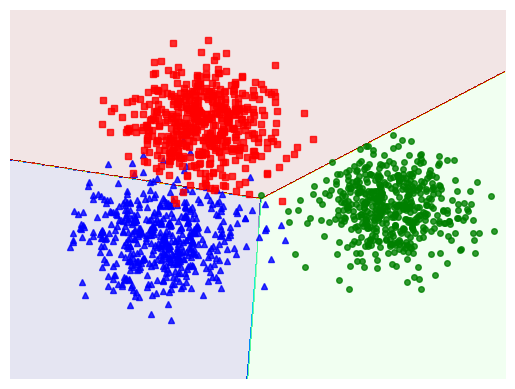

<Figure size 640x480 with 0 Axes>

In [70]:
#Visualize
xm = np.arange(-2, 11, 0.025)
xlen = len(xm)
ym = np.arange(-3, 10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)
print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)
print(XX.shape)
Z = pred(W[-1], XX)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)
plt.xlim(-2, 11)
plt.ylim(-3, 10)
plt.xticks(())
plt.yticks(())
display(X[1:, :], original_label)
plt.savefig('ex1.png', bbox_inches='tight', dpi = 300)
plt.show()
